# Assignment 2 - Telecommunications Stock Price // Change to my Dataset!!

### Author: DAVID KASONGO TAMBWE
### Student Number: 222174324
### Date: 10 April 2024
### Source: Kaggle
### GitHub url: https://github.com/Emmanuel-bit1234/assignment3/blob/main/DescriptiveAnalysis.ipynb // https://github.com/Daviddkdt/Assignment2.git //Change Github link to mine!
![Minerals Image](StockMarket.jpg)

# Context

Access to accurate and timely stock market information is fundamental for maintaining financial health, upholding the integrity of investment processes, and implementing effective market strategies. Ensuring reliable access to stock market data is a vital aspect of national, regional, and local economic development. In certain contexts, it has been demonstrated that investing in stock market infrastructure can lead to significant economic gains. This is because the reduction in uncertainty, improved decision-making, and optimized investment outcomes outweigh the costs associated with acquiring and managing this information.Stock market information is indispensable for fostering robust financial ecosystems and driving economic growth.Investments in stock market infrastructure can yield substantial returns for investors, businesses, and economies.

# Data Description

Metadata of the dataset


The dataset appears to represent stock market data, with the following columns:

1.Date: The date of the trading session, in YYYY-MM-DD format.

2.Open: The price at which the stock first traded upon the opening of the exchange that day.

3.High: The highest price at which the stock traded during the trading day.

4.Low: The lowest price at which the stock traded during the trading day.

5.Close: The price at which the stock last traded upon the close of the exchange that day.

6.Adj Close: The closing price after adjustments for all applicable splits and dividend distributions.

7.Volume: The number of shares that changed hands during the trading day.

This data is essential for analyzing market trends, evaluating stock performance over time, and making investment decisions.
The Date column serves as a time series index, which is crucial for chronological analysis. The Open, High, Low, and Close prices provide insight into the daily price movement, while the Adj Close price is useful for historical comparisons. Finally, the Volume indicates the trading activity and can be an indicator of market interest in the stock.


# Importing Libraries and Loading Data

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gmean
import statsmodels.api as sm
from scipy.stats import kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind, f_oneway
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress


### Loading Data

In [2]:
stock_price = pd.read_csv('stockMarketData.csv')
stock_price.head(10).style.hide(axis="index")

Date,Open,High,Low,Close,Adj Close,Volume
2005-01-26,965.000000,975.000000,965.000000,970.000000,548.346130,84725000.000000
2005-01-27,970.000000,970.000000,960.000000,960.000000,542.692932,134222500.000000
2005-01-28,965.000000,965.000000,955.000000,960.000000,542.692932,100760000.000000
2005-01-31,960.000000,965.000000,950.000000,960.000000,542.692932,137322500.000000
2005-02-01,965.000000,975.000000,960.000000,965.000000,545.519531,69960000.000000
2005-02-02,965.000000,970.000000,950.000000,950.000000,537.040039,103680000.000000
2005-02-03,950.000000,955.000000,935.000000,940.000000,531.387024,125185000.000000
2005-02-04,940.000000,945.000000,935.000000,935.000000,528.560364,66002500.000000
2005-02-07,940.000000,945.000000,930.000000,930.000000,525.733948,48097500.000000
2005-02-08,930.000000,930.000000,920.000000,925.000000,522.907166,60667500.000000


In [3]:
# Get information about the data types and missing values
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


# Data Cleaning

In [4]:
# Get information about the missing data
stock_price.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
# Doing a data cleaning by handling missing value with average of features
stock_price["Open"].fillna(stock_price["Open"].mean(skipna=True), inplace=True)
stock_price["High"].fillna(stock_price["High"].mean(skipna=True), inplace=True)
stock_price["Low"].fillna(stock_price["Low"].mean(skipna=True), inplace=True)
stock_price["Close"].fillna(stock_price["Close"].mean(skipna=True), inplace=True)
stock_price["Adj Close"].fillna(stock_price["Adj Close"].mean(skipna=True), inplace=True)
stock_price["Volume"].fillna(stock_price["Volume"].mean(skipna=True), inplace=True)

# Time Series Analysis

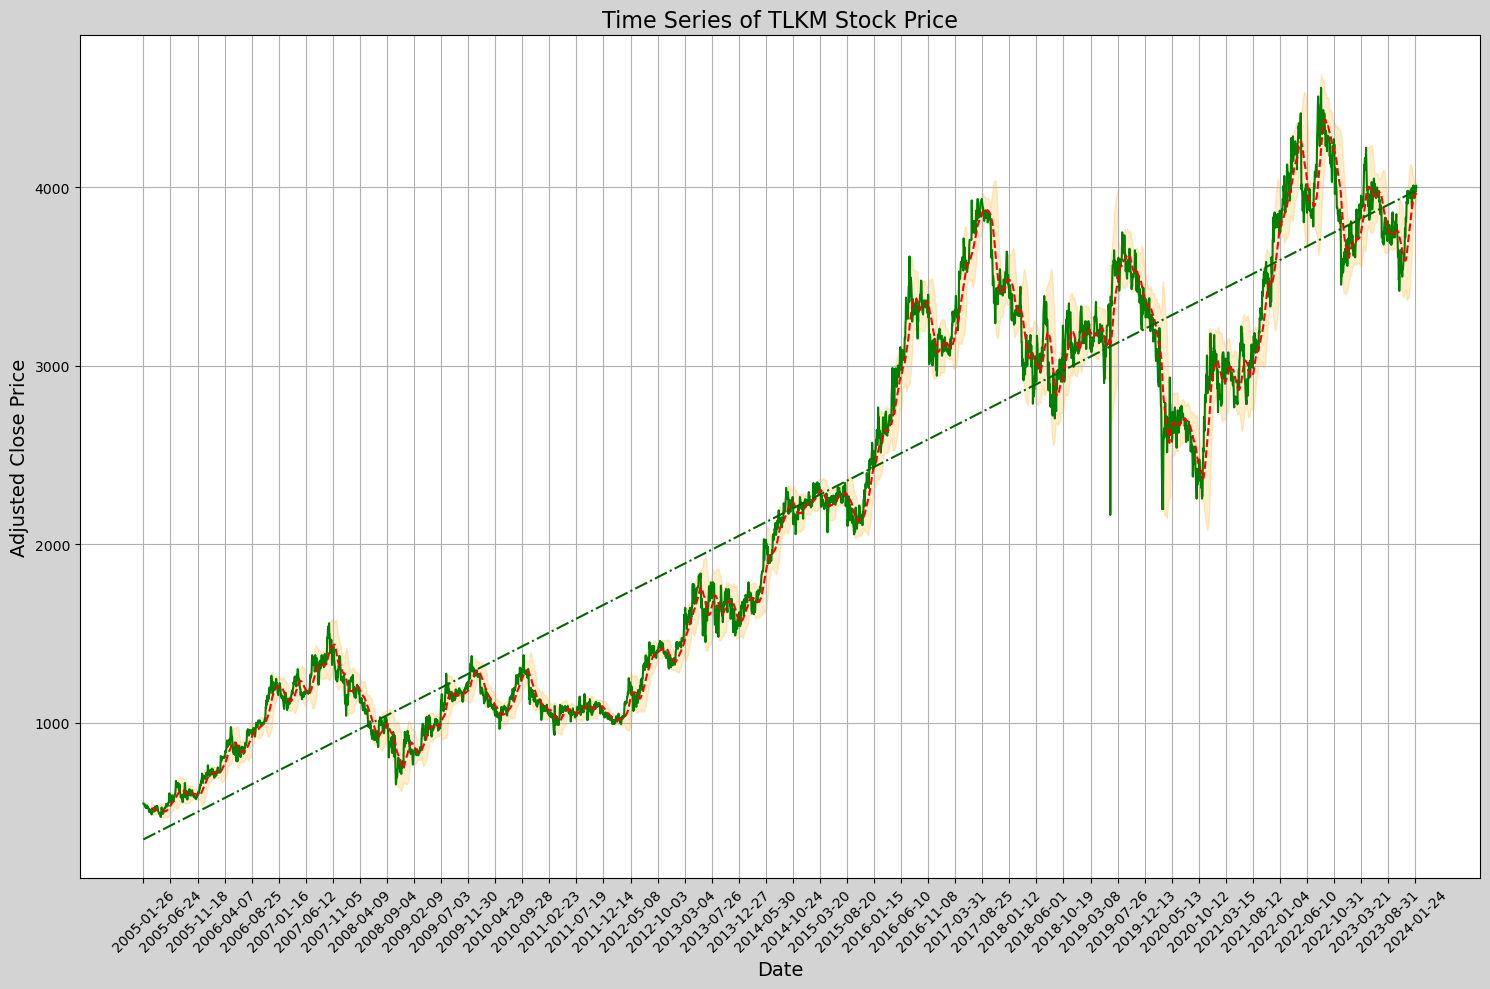

In [6]:
window_size = 30
ma = stock_price['Adj Close'].rolling(window=window_size).mean()
mstd = stock_price['Adj Close'].rolling(window=window_size).std()
slope, intercept, _, _, _ = linregress(np.arange(len(stock_price)), stock_price['Adj Close'])

plt.figure(figsize=(15, 10), facecolor='lightgrey')
plt.plot(stock_price.Date, stock_price['Adj Close'], color='green')
plt.plot(stock_price.Date, ma, label=f'{window_size}-day MA', linestyle='--', color='red')
plt.fill_between(stock_price.Date, ma - 2 * mstd, ma + 2 * mstd, alpha=0.2, label=f'{window_size}-day MSTD', color='orange') 
plt.plot(stock_price.Date, intercept + slope * np.arange(len(stock_price)), label='Linear Fit', linestyle='-.', color='darkgreen')

n = 100
plt.xticks(stock_price.Date[::n])
plt.xticks(rotation=45)

plt.title("Time Series of TLKM Stock Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# There are no more null or missing values
stock_price.isnull().sum()
stock_price = stock_price.drop(columns='Date')

# Descriptive Analysis

In [8]:
# Descriptive Analysis
n = stock_price.count()
mean_all = stock_price.mean()
median_all = stock_price.median()
geometric_mean_all = stock_price.apply(gmean)
mode_all = stock_price.apply(lambda x: x.value_counts().idxmax())
std_all = np.std(stock_price)
var_all = np.var(stock_price)
kurtosis_all = kurtosis(stock_price)
skewness_all = stock_price.apply(lambda x: np.sum(((x - x.mean()) / x.std())**3)) / n
range_all = stock_price.max() - stock_price.min()
min_all = stock_price.min()
max_all = stock_price.max()
sum_all = stock_price.sum()
count_all = stock_price.count()
largest_1 = stock_price.apply(lambda x: x.nlargest(1).iloc[0])
smallest_1 = stock_price.apply(lambda x: x.nsmallest(1).iloc[0])
cv_all = std_all / mean_all
q1 = stock_price.apply(lambda x: np.percentile(x, 25))
q3 = stock_price.apply(lambda x: np.percentile(x, 75))
q2 = stock_price.apply(lambda x: np.percentile(x, 50))
iqr_all = q3 - q1
mad_all = stock_price.apply(lambda x: np.mean(np.abs(x - x.mean())))
medad_all = stock_price.apply(lambda x: np.median(np.abs(x - x.median())))
qcd_all = (q3 - q1) / (q3 + q1)
p10 = stock_price.apply(lambda x: np.percentile(x, 10))
p90 = stock_price.apply(lambda x: np.percentile(x, 90))



summary_df = pd.DataFrame({'Mean': mean_all, 'Median': median_all,'Geometric mean': geometric_mean_all, 'Mode': mode_all, 'Standard Deviation': std_all,
                           'Sample Variance': var_all, 'Kurtosis': kurtosis_all, 'Skewness': skewness_all,
                           'Range': range_all, 'Minimum': min_all, 'Maximum': max_all, 'Sum': sum_all, 'Count': count_all,
                           'Largest(1)': largest_1, 'Smallest(1)': smallest_1,'Coefficient of Variation' : cv_all, 
                            'First Quartile' : q1, 'Second Quartile' : q2, 'Third Quartile' : q3, 'Interquartile Range' : iqr_all,
                          'Mean Absolute Deviation' : mad_all, 'Median Absolute Deviation' : medad_all, 
                           'Quartile Coefficient of Dispersion' : qcd_all, 'Percentile 10' : p10, 'Percentile 90' : p90 })

summary_df_styled = summary_df.style.set_table_styles([    {'selector': 'th', 'props': [('border', '1px solid black'), ('background-color', 'lightblue')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]},
    {'selector': 'th:first-child', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'th, td:first-child', 'props': [('background-color', 'lightblue')]}
])

summary_df_styled


,Mean,Median,Geometric mean,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Largest(1),Smallest(1),Coefficient of Variation,First Quartile,Second Quartile,Third Quartile,Interquartile Range,Mean Absolute Deviation,Median Absolute Deviation,Quartile Coefficient of Dispersion,Percentile 10,Percentile 90
Open,2694.108418,2640.000000,2449.195069,1600.000000,1113.310333,1239459.897281,-1.414424,0.143938,4030.000000,820.000000,4850.000000,12675780.108418,4705,4850.000000,820.000000,0.413239,1640.000000,2640.000000,3800.000000,2160.000000,1006.277777,1070.000000,0.397059,1400.000000,4190.000000
High,2724.414328,2695.000000,2478.283214,1600.000000,1121.998384,1258880.374383,-1.419277,0.139214,4005.000000,845.000000,4850.000000,12818369.414328,4705,4850.000000,845.000000,0.411831,1660.000000,2695.000000,3830.000000,2170.000000,1014.226507,1095.000000,0.395264,1420.000000,4220.000000
Low,2663.815901,2610.000000,2420.158852,1450.000000,1104.377523,1219649.714043,-1.413860,0.146711,3960.000000,820.000000,4780.000000,12533253.815901,4705,4780.000000,820.000000,0.414585,1620.000000,2610.000000,3760.000000,2140.000000,998.366074,1070.000000,0.397770,1380.000000,4150.000000
Close,2694.080570,2645.000000,2449.315589,1490.000000,1113.162372,1239130.467261,-1.415450,0.144591,3965.000000,835.000000,4800.000000,12675649.080570,4705,4800.000000,835.000000,0.413188,1640.000000,2645.000000,3800.000000,2160.000000,1005.928654,1075.000000,0.397059,1400.000000,4190.000000
Adj Close,2164.720298,2103.073730,1849.571331,1036.642090,1127.178916,1270532.307895,-1.398670,0.245698,4086.140076,472.029846,4558.169922,10185009.001864,4705,4558.169922,472.029846,0.520704,1115.453735,2103.073730,3193.085938,2077.632203,1022.272857,1016.716309,0.482213,890.122986,3760.000000
Volume,99973813.756378,85877500.000000,0.000000,0.000000,65045811.183393,4230957552505607.500000,24.348043,3.035738,1155861400.000000,0.000000,1155861400.000000,470376793723.756348,4705,1155861400.000000,0.000000,0.650628,60777500.000000,85877500.000000,121872500.000000,61095000.000000,44168925.402739,28820700.000000,0.334492,43295780.000000,175348500.000000


### z Scores

In [9]:
#Z Scores
def z_scores(x):
    return (x - x.mean()) / x.std()

z_scores_all = stock_price.apply(z_scores)
z_scores_all.head(10).style.hide(axis="index")

Open,High,Low,Close,Adj Close,Volume
-1.552958,-1.559029,-1.538093,-1.548649,-1.433847,-0.234407
-1.548468,-1.563485,-1.542620,-1.557631,-1.438862,0.526476
-1.552958,-1.567941,-1.547147,-1.557631,-1.438862,0.012085
-1.557449,-1.567941,-1.551674,-1.557631,-1.438862,0.574129
-1.552958,-1.559029,-1.542620,-1.553140,-1.436355,-0.461377
-1.552958,-1.563485,-1.551674,-1.566614,-1.443877,0.056972
-1.566430,-1.576853,-1.565255,-1.575596,-1.448891,0.387550
-1.575412,-1.585765,-1.565255,-1.580087,-1.451399,-0.522212
-1.575412,-1.585765,-1.569782,-1.584578,-1.453906,-0.797450
-1.584393,-1.599132,-1.578836,-1.589070,-1.456414,-0.604222


### Regression Analysis

In [10]:
# Define the target variable and the features
target = 'Close'
features = [col for col in stock_price.columns if col != target]

# Separate the target variable and the features
X = stock_price[features]
y = stock_price[target]

# Add a constant term to the features matrix (for the intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.320e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:51:50   Log-Likelihood:                -21304.
No. Observations:                4705   AIC:                         4.262e+04
Df Residuals:                    4699   BIC:                         4.266e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9512      1.346      4.422      0.0

### Distribution of features

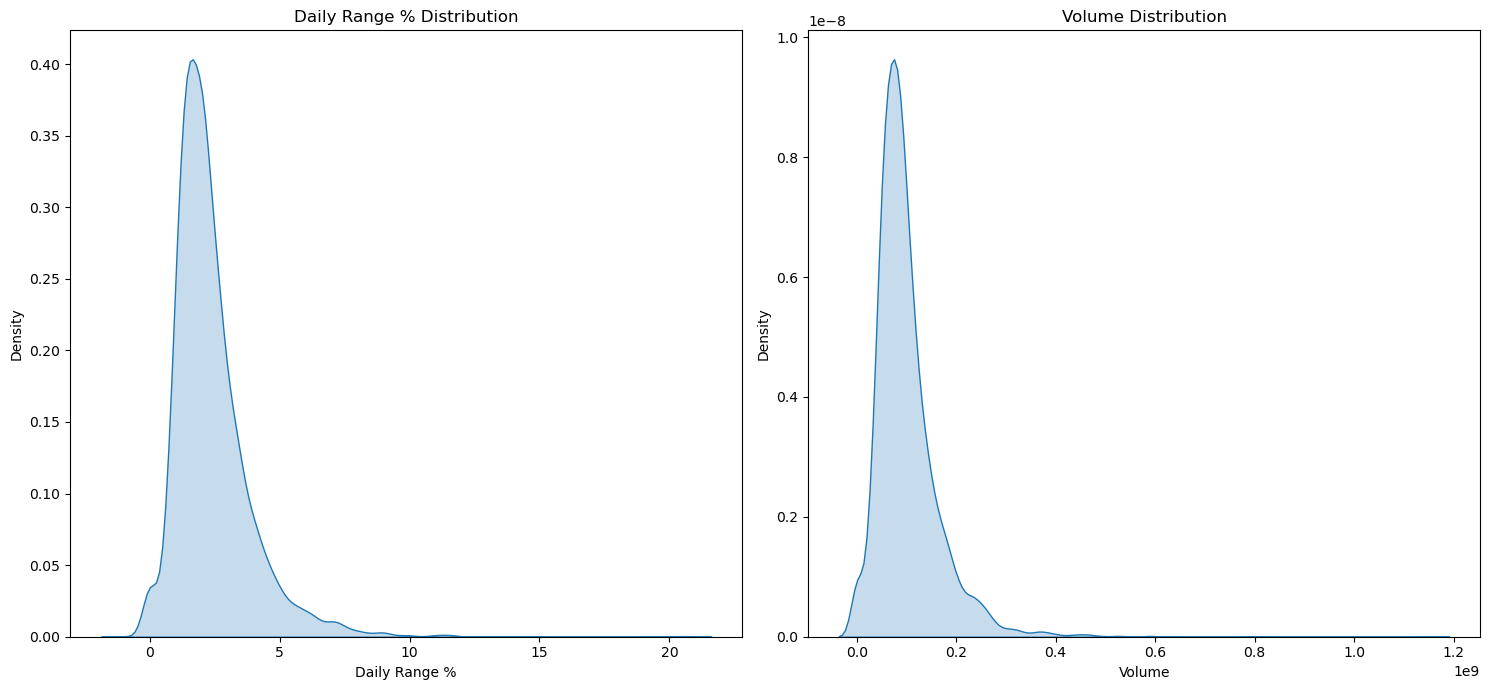

In [11]:
# Assuming 'stock_data' is your DataFrame
# For the sake of example, let's consider comparing distributions of daily high-low range and daily closing prices.

# Calculate daily high-low range as a percentage of opening price
stock_price['Daily Range %'] = ((stock_price['High'] - stock_price['Low']) / stock_price['Open']) * 100

plt.figure(figsize=(15, 7))

# First subplot for Daily Range %
plt.subplot(1, 2, 1)
plt.title('Daily Range % Distribution')
sns.kdeplot(data=stock_price, x='Daily Range %', fill=True)

# Second subplot for Volume
plt.subplot(1, 2, 2)
plt.title('Volume Distribution')
sns.kdeplot(data=stock_price, x='Volume', fill=True, common_norm=False)

plt.tight_layout()
plt.show()

### Correlation

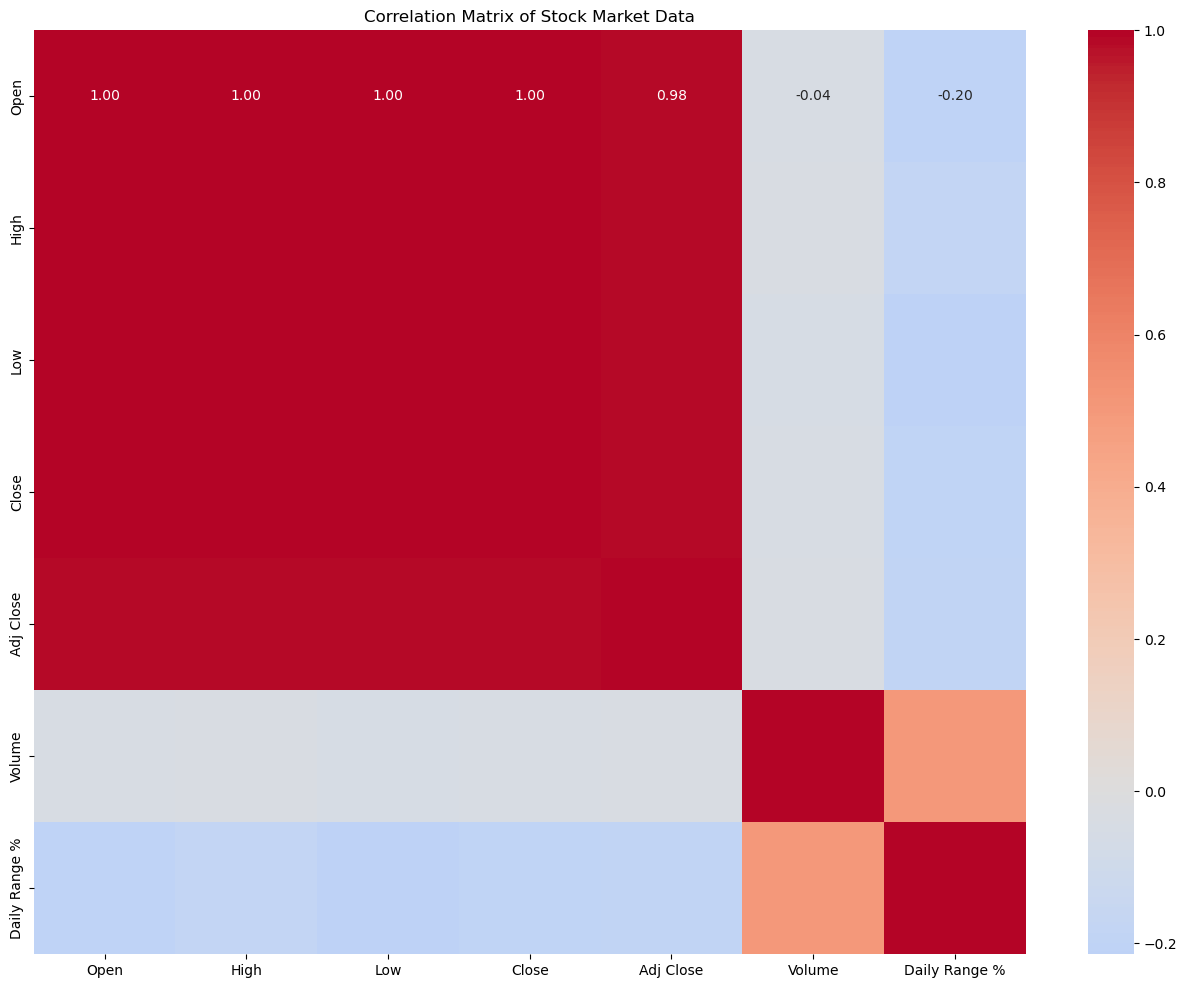

In [12]:
# Assuming 'stock_data' is your large DataFrame with the correct stock market data

# Use the built-in `corr` method to calculate the correlation matrix
correlation_matrix = stock_price.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Stock Market Data')
plt.show()

### Covariance

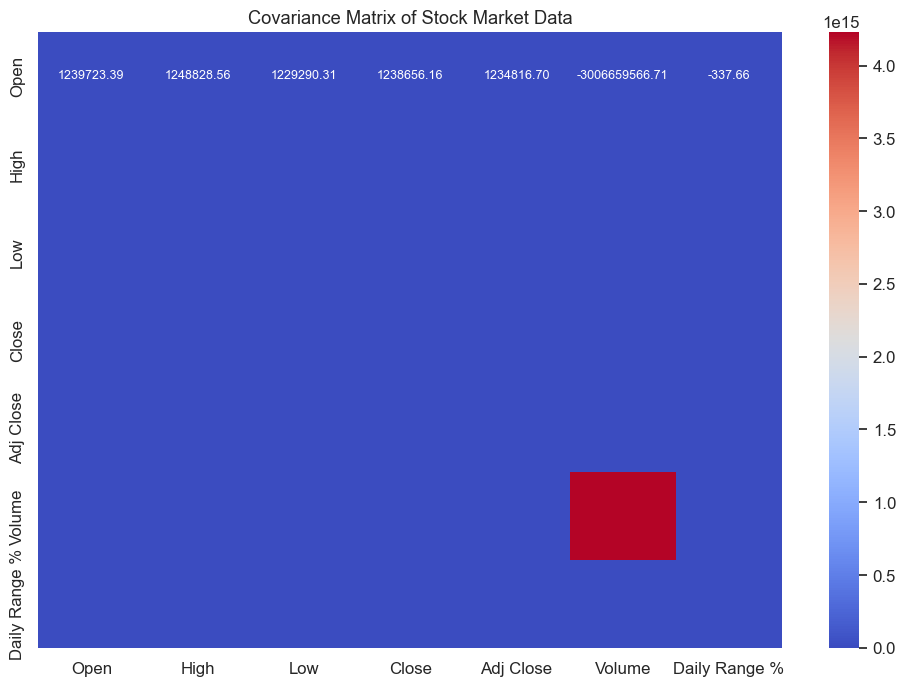

In [13]:
# Define a function to calculate the covariance between two columns
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    n = len(x)

    return np.sum((x - x_mean) * (y - y_mean)) / (n - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = stock_price.apply(lambda x: stock_price.apply(lambda y: covariance(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 9})
plt.title('Covariance Matrix of Stock Market Data')
plt.show()

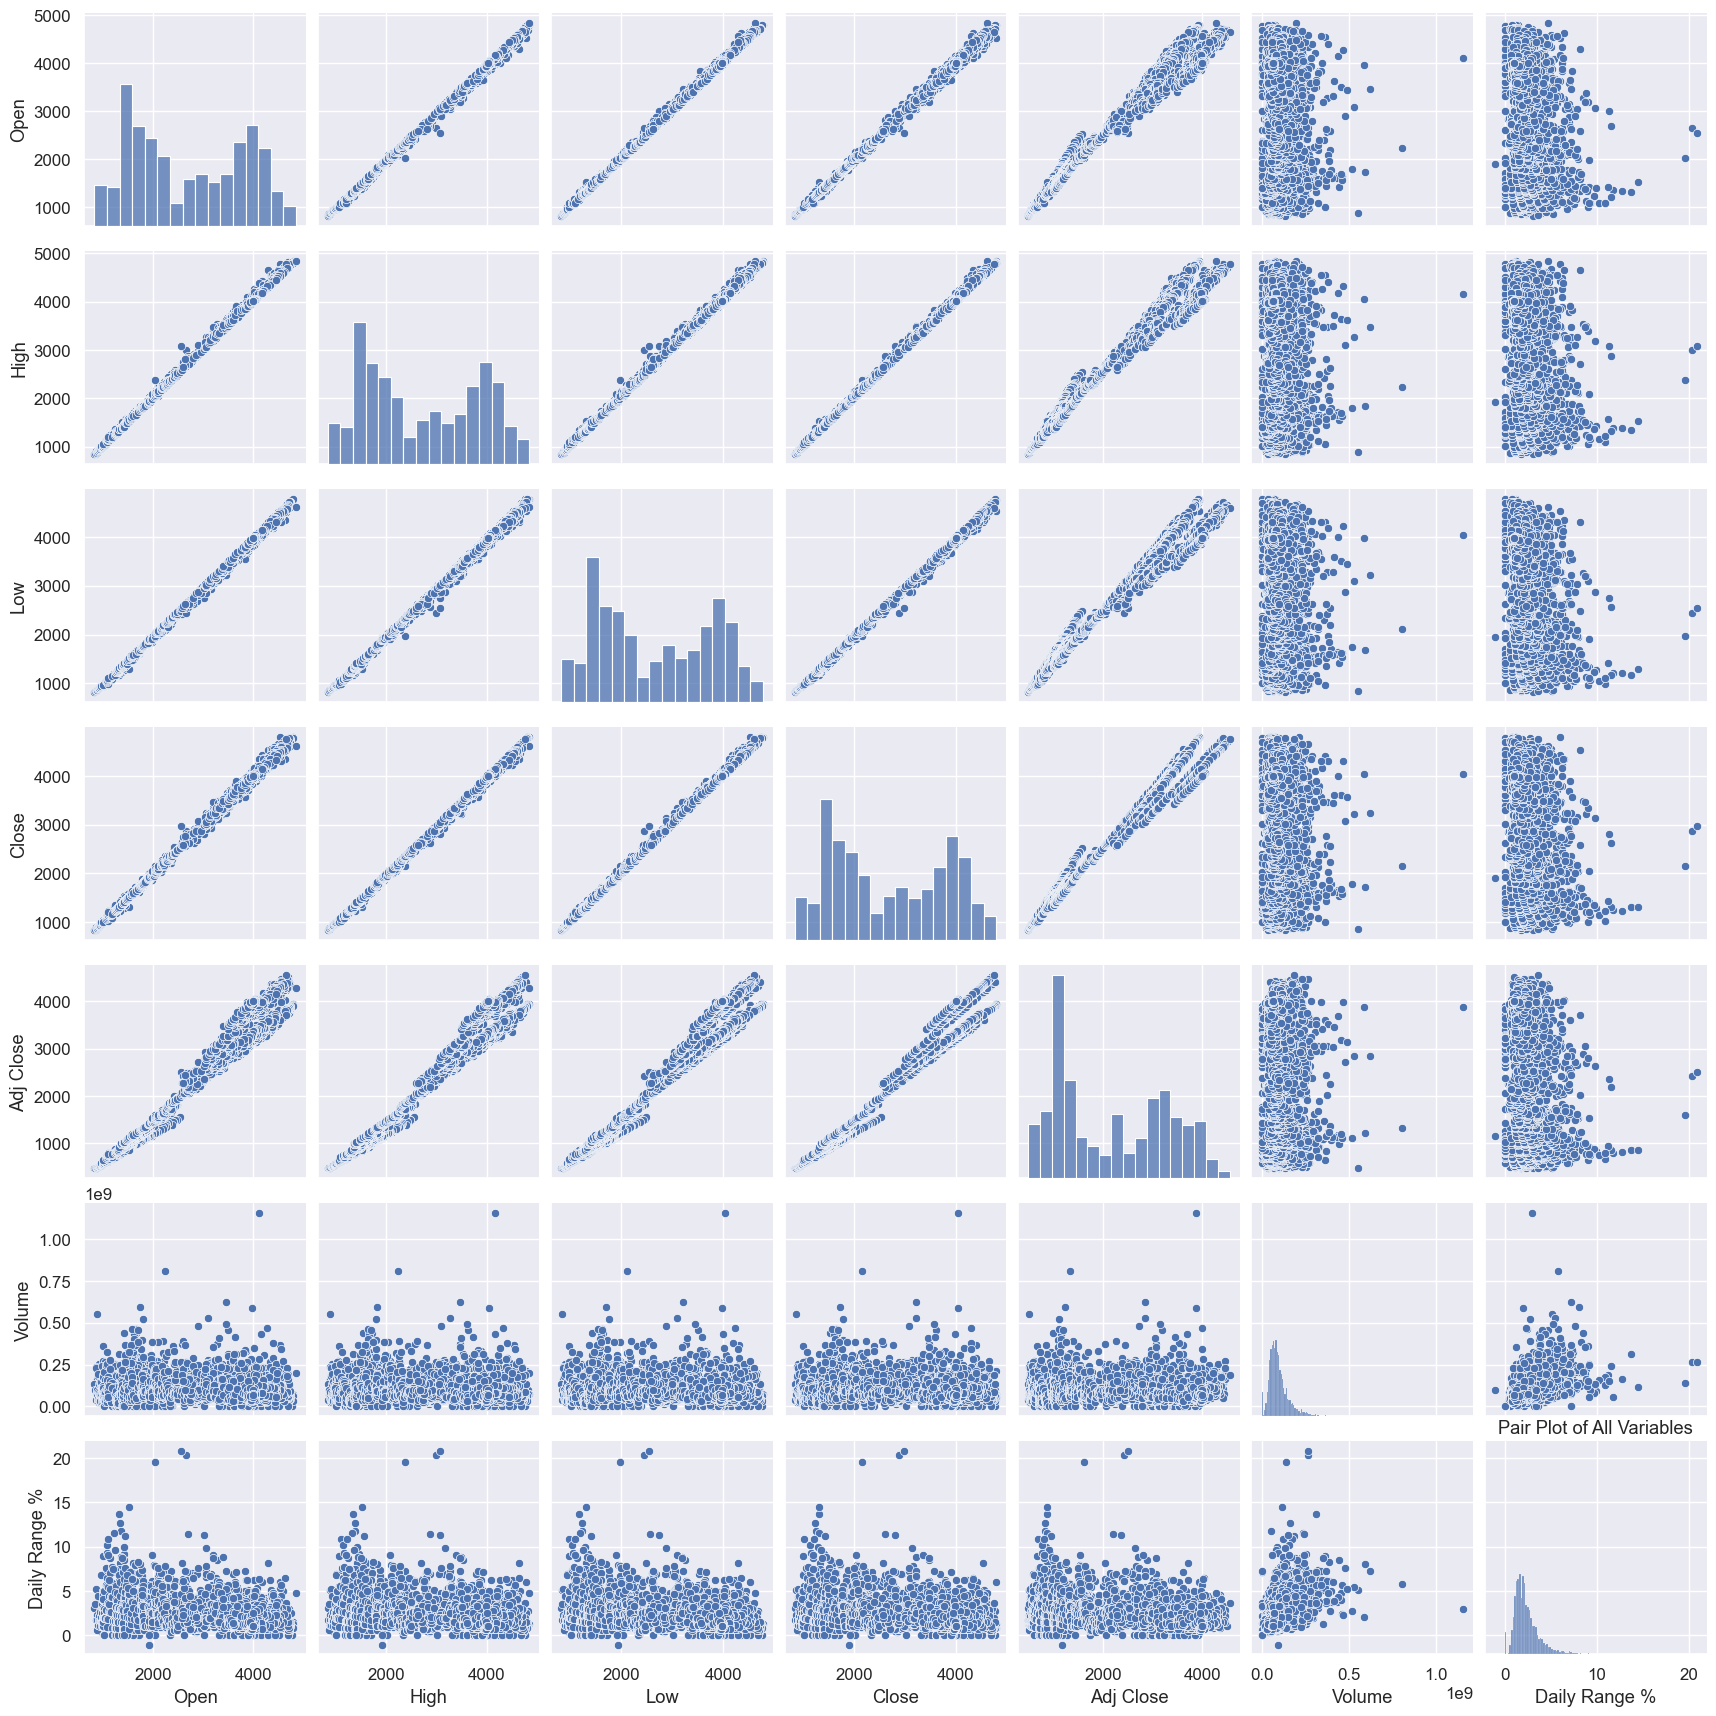

In [14]:
sns.pairplot(stock_price)
plt.title('Pair Plot of All Variables')
plt.show()

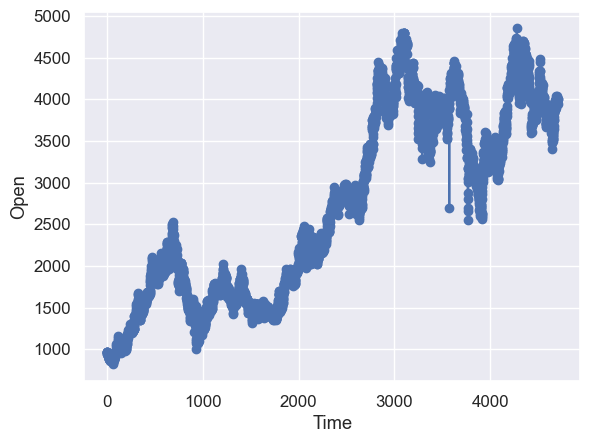

In [15]:
plt.plot(stock_price['Open'], '-o')
plt.xlabel('Time')
plt.ylabel('Open')
plt.show()

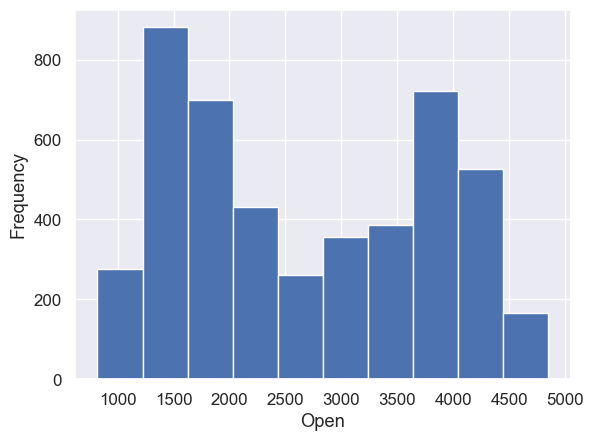

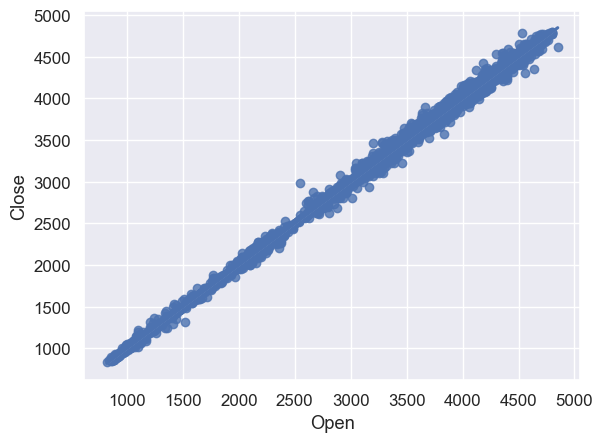

<Axes: xlabel='Volume', ylabel='Open'>

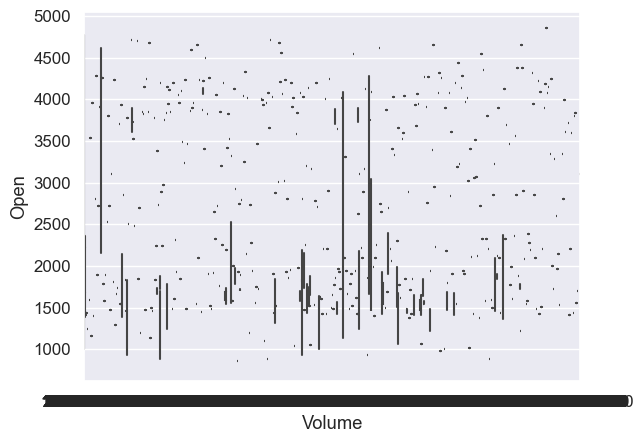

In [16]:
plt.hist(stock_price['Open'], bins=10)
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.show()

sns.regplot(x='Open', y='Close', data=stock_price)
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

sns.boxplot(x='Volume', y='Open', data=stock_price)

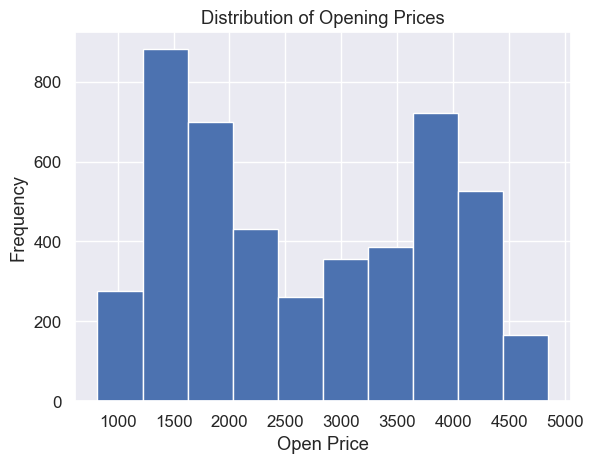

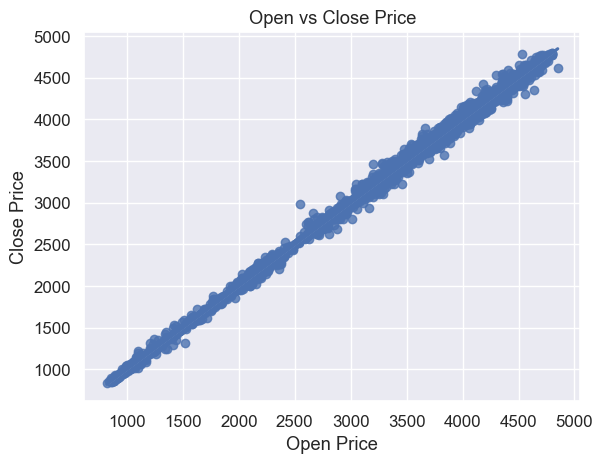

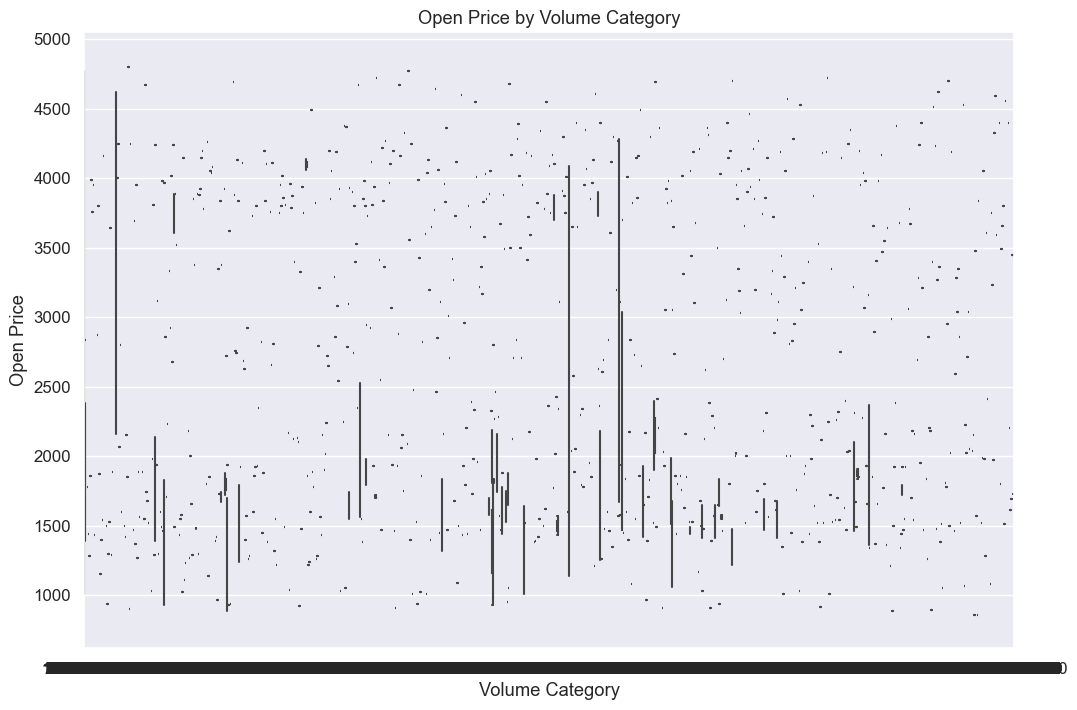

In [17]:
# Histogram of the 'Open' prices
plt.hist(stock_price['Open'], bins=10)
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

# Scatter plot with regression line of 'Open' vs 'Close' prices
sns.regplot(x='Open', y='Close', data=stock_price)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')
plt.show()

# Increase the size of the boxplot
plt.figure(figsize=(12, 8))  # Increase the figure size (width, height) in inches

# Create a boxplot of 'Open' prices categorized by 'Volume'
sns.boxplot(x='Volume', y='Open', data=stock_price)

# Set the labels and title
plt.xlabel('Volume Category')
plt.ylabel('Open Price')
plt.title('Open Price by Volume Category')

# Display the plot
plt.show()


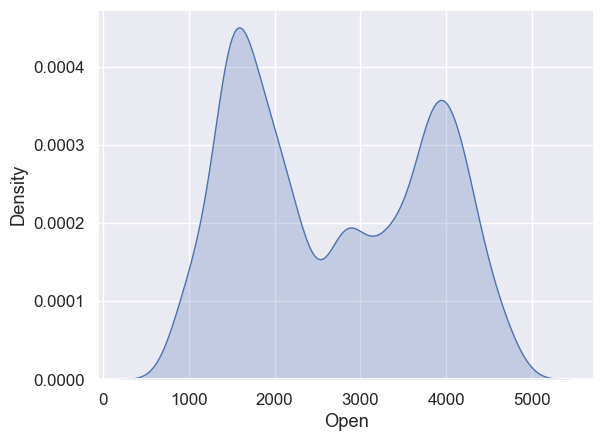

In [18]:
sns.kdeplot(stock_price['Open'], fill=True)
plt.xlabel('Open')
plt.show()
#Density plot

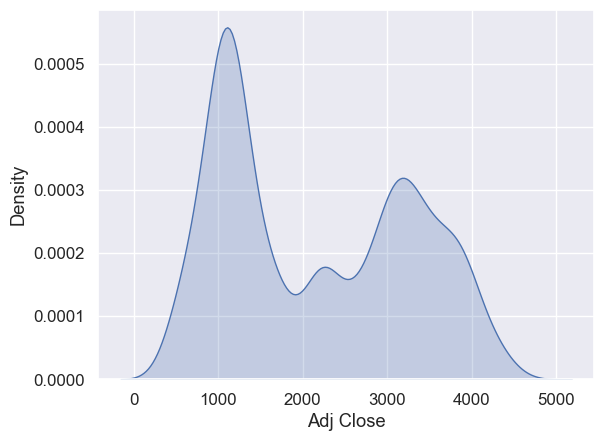

In [19]:
sns.kdeplot(stock_price['Adj Close'], fill=True)
plt.xlabel('Adj Close')
plt.show()
#Density plot

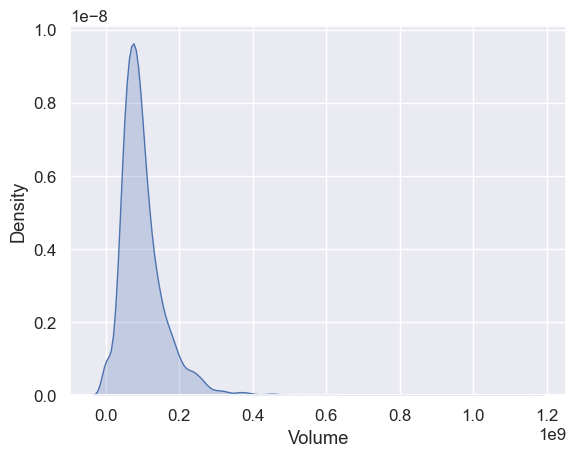

In [20]:
sns.kdeplot(stock_price['Volume'], fill=True)
plt.xlabel('Volume')
plt.show()
#Density plot

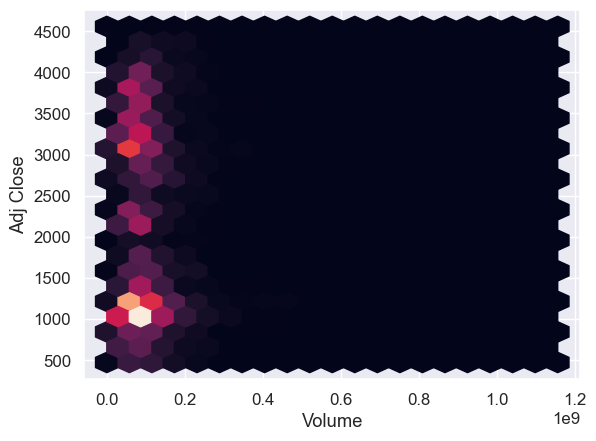

In [21]:
plt.hexbin(x=stock_price['Volume'], y=stock_price['Adj Close'], gridsize=20)
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()
#Hexbin plot

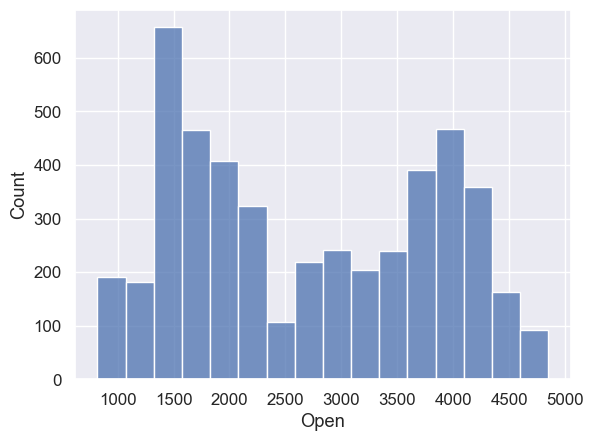

In [22]:
sns.histplot(stock_price["Open"])
plt.show()

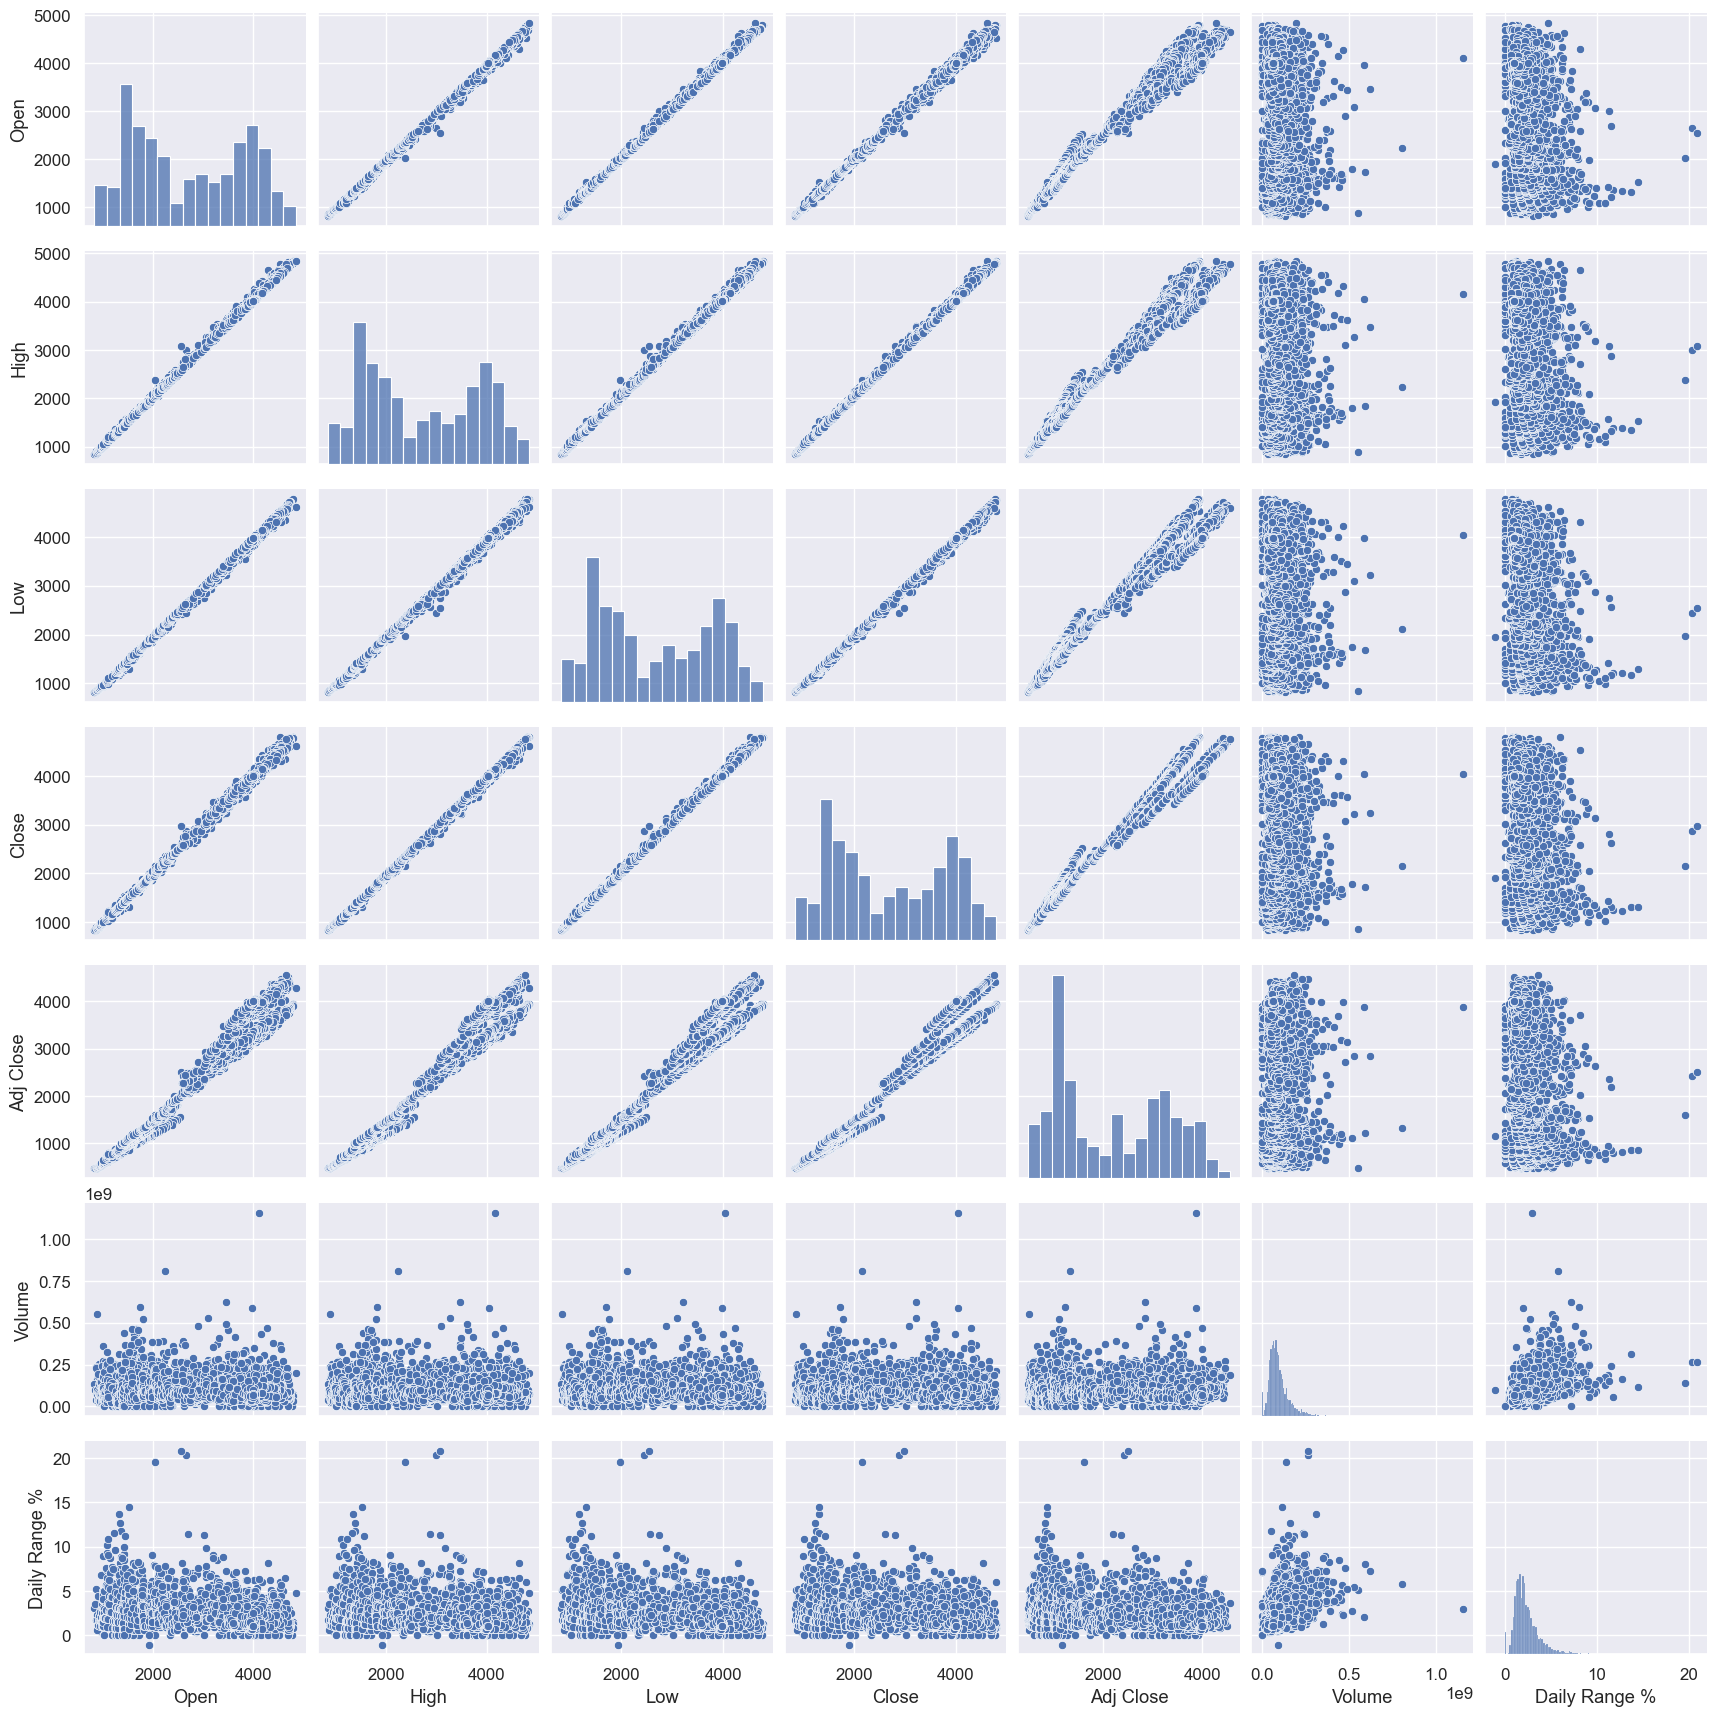

In [23]:
sns.pairplot(data=stock_price)

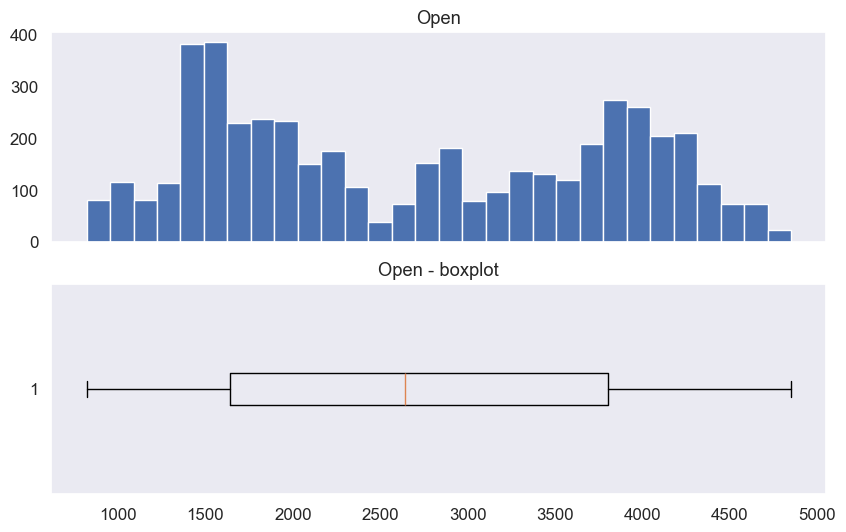

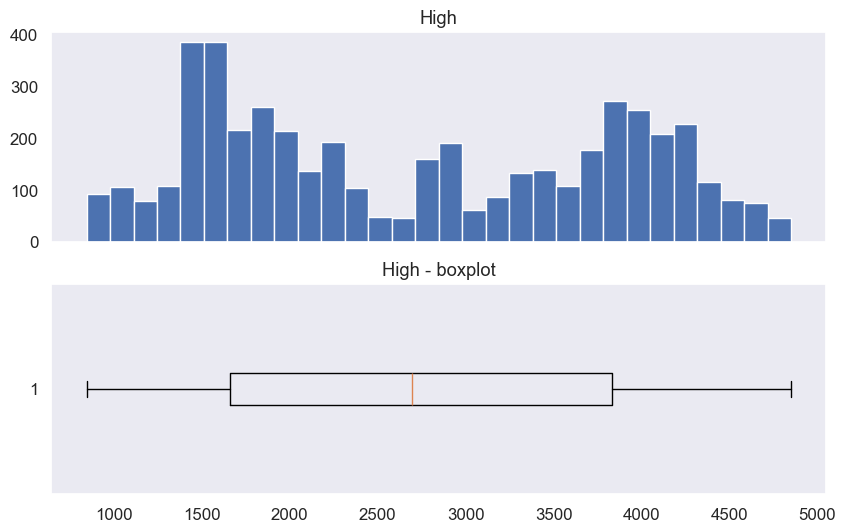

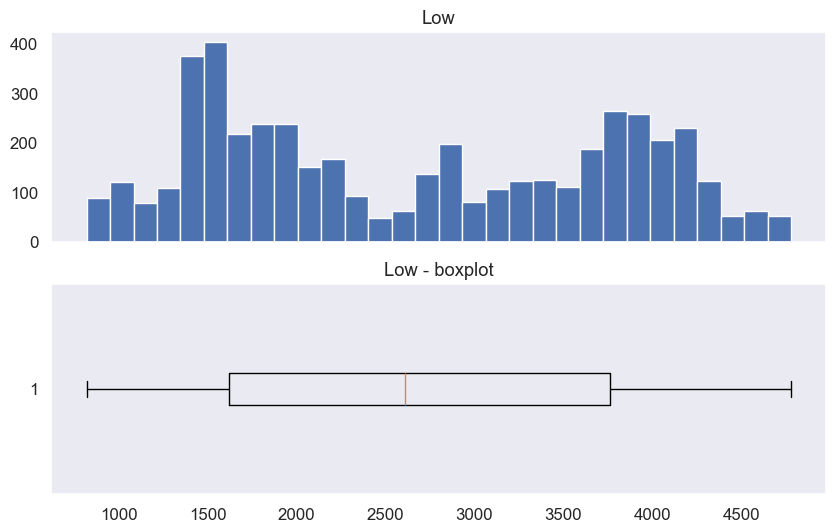

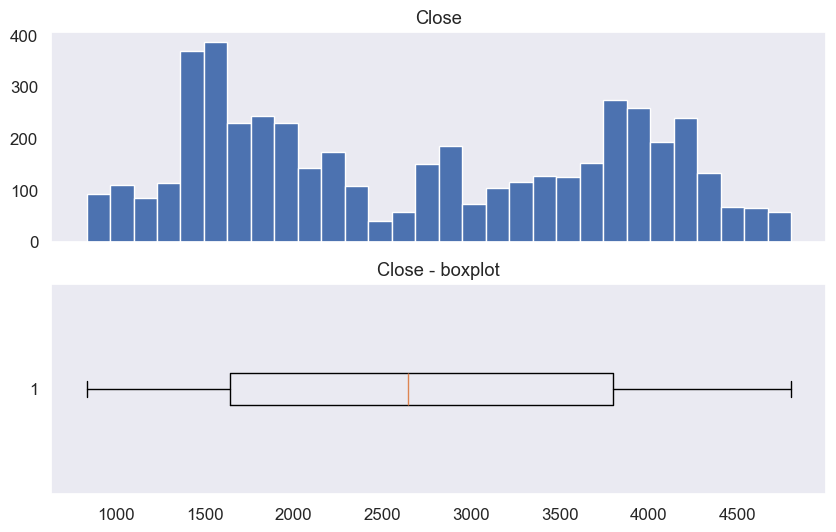

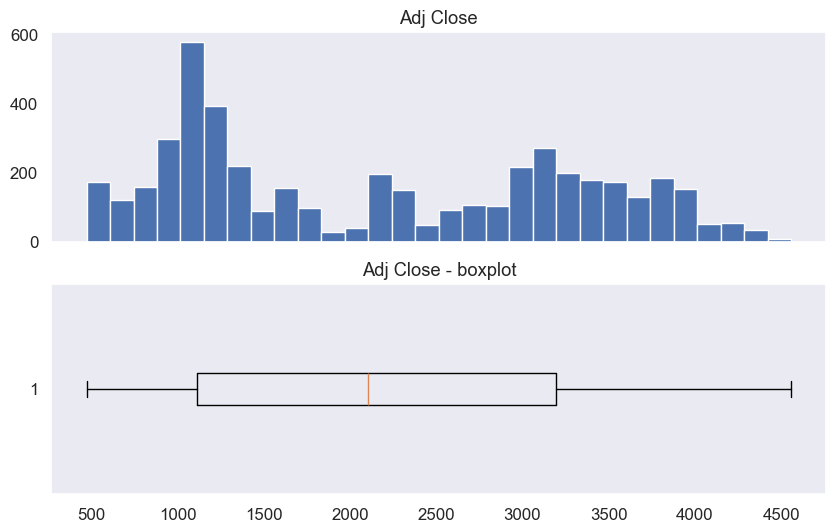

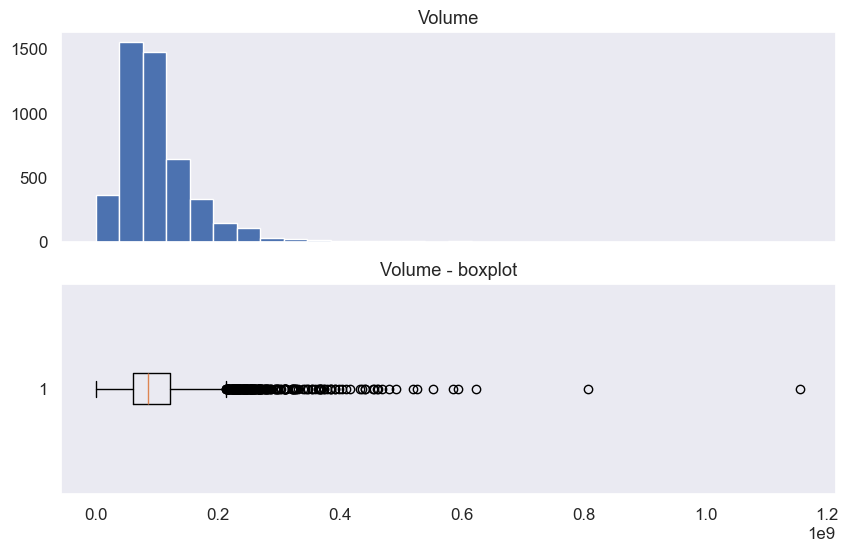

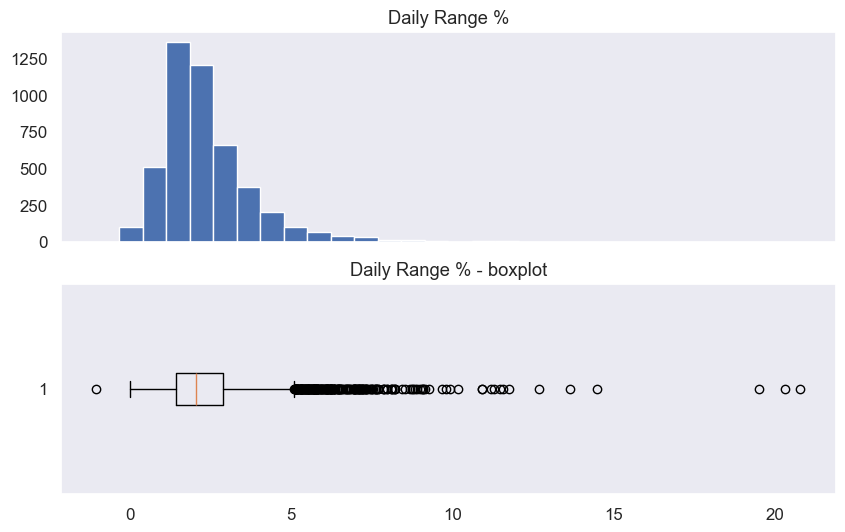

In [24]:
stock_price_data = stock_price.drop([], axis = 1)
# plot distribution of numerical features
for f in stock_price_data:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax1.hist(stock_price_data[f], bins=30)
    ax1.grid()
    ax1.set_title(f)
    # for boxplot we need to remove the NaNs first
    feature_wo_nan = stock_price_data[~np.isnan(stock_price_data[f])][f]
    ax2.boxplot(feature_wo_nan, vert=False)
    ax2.grid()
    ax2.set_title(f + ' - boxplot')
    plt.show()

### Kernel Density Estimate Plots for Telecommunications Stock Price Variables

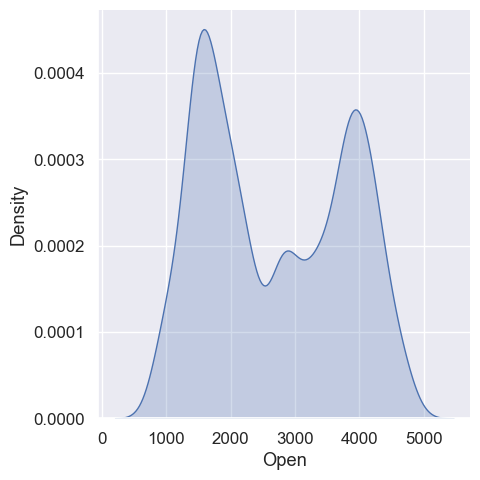

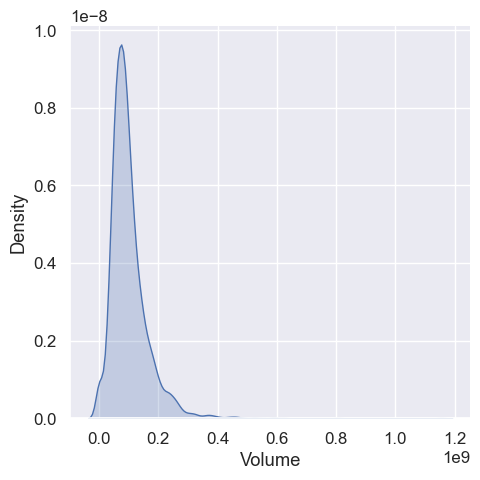

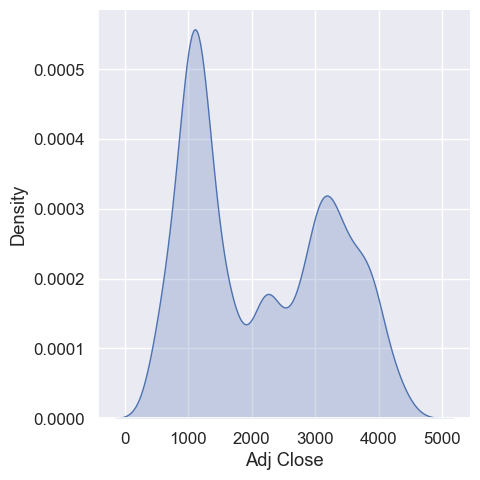

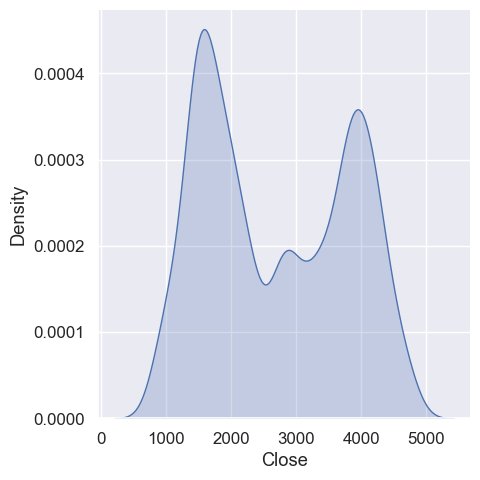

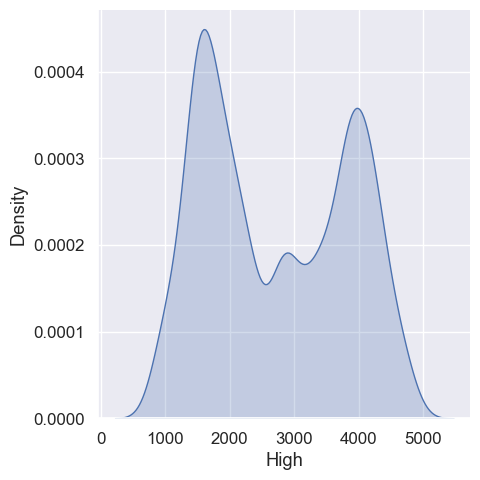

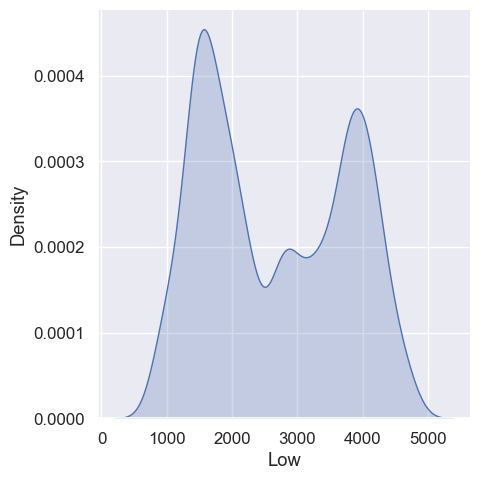

In [25]:
sns.displot(stock_price, x="Open", kind="kde", fill=True)
sns.displot(stock_price, x="Volume", kind="kde", fill=True)
sns.displot(stock_price, x="Adj Close", kind="kde", fill=True)
sns.displot(stock_price, x="Close", kind="kde", fill=True)
sns.displot(stock_price, x="High", kind="kde", fill=True)
sns.displot(stock_price, x="Low", kind="kde", fill=True)

### Analyzing and Visualizing the Linear Trend

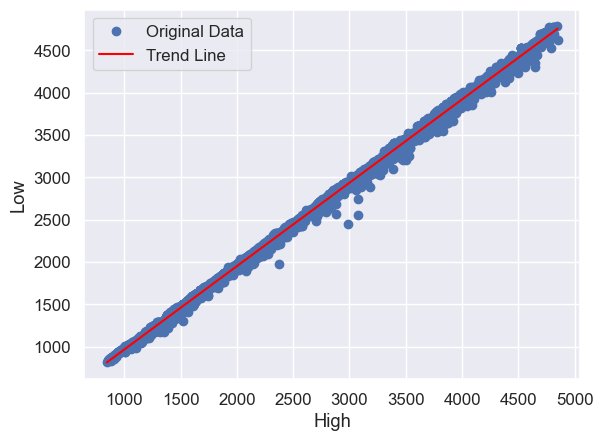

In [26]:
# Create an index column representing the order of observations
# Add a new column 'Index' to the DataFrame
X = stock_price[['High']]
y = stock_price['Low']

model = LinearRegression()
model.fit(X, y)

# Calculate the trend line
trend_line = model.predict(X)

# Sort the 'High' prices for better visualization
sorted_high = np.sort(stock_price['High'])

# Plot the original 'Low' prices against sorted 'High' prices
plt.plot(stock_price['High'], stock_price['Low'], 'o', label='Original Data')
# Plot the trend line
plt.plot(sorted_high, trend_line[np.argsort(stock_price['High'])], '-', label='Trend Line', color='red')

plt.xlabel('High')
plt.ylabel('Low')
plt.legend(loc='upper left')
plt.show()

Text(1.4, 180, '')

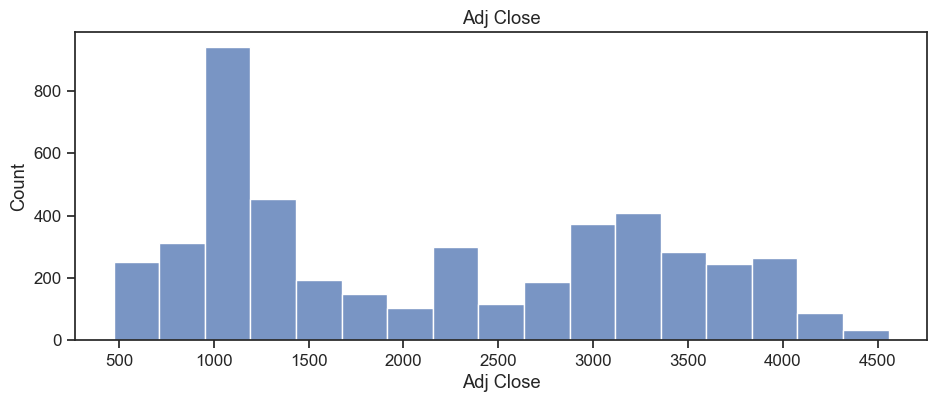

In [27]:
sns.set_style('ticks')
plt.figure(figsize=(11,4))
sns.histplot(x='Adj Close', data=stock_price, multiple='stack', palette='GnBu')
plt.title('Adj Close')
plt.text(x=1.4, y=180, s='')

### Box Plots to visualize outliers

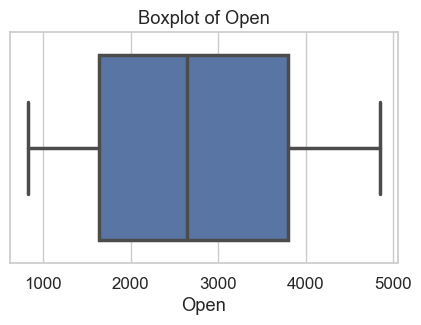

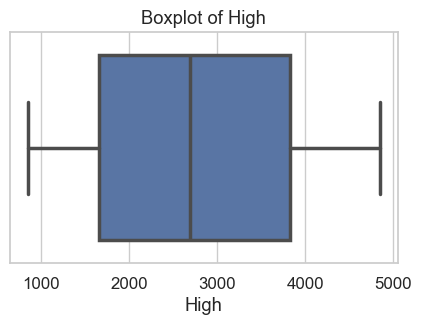

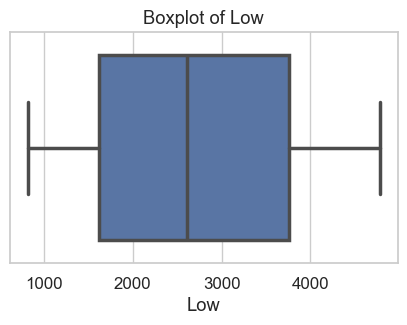

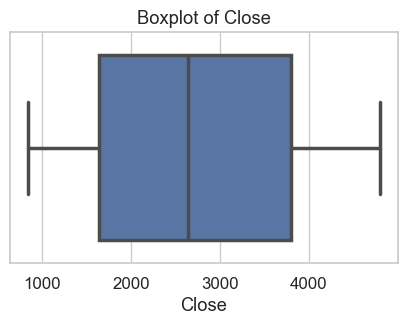

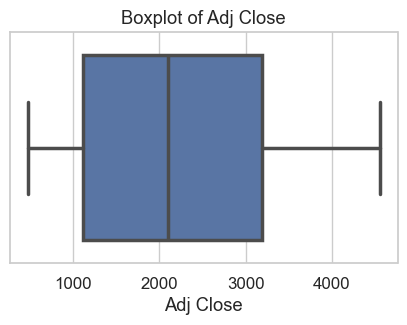

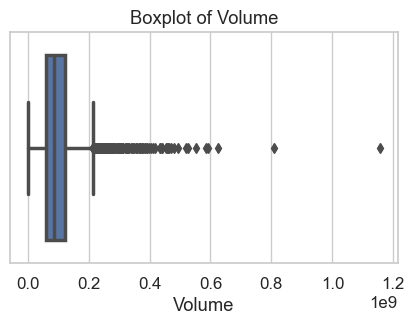

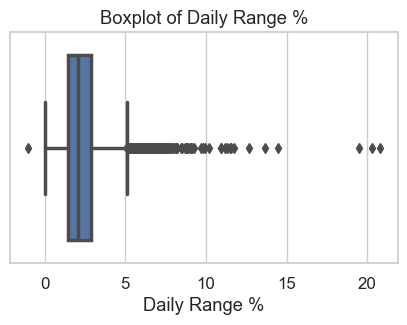

In [28]:
for col in stock_price:
    plt.figure(figsize=(5, 3))
    sns.set_style("whitegrid")
    sns.boxplot(x=stock_price[col], linewidth=2.5)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

### Histograms of Telecommunications Stock Price Parameters in the Dataset

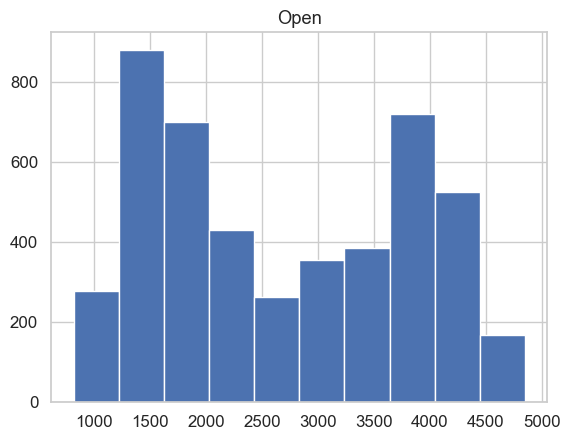

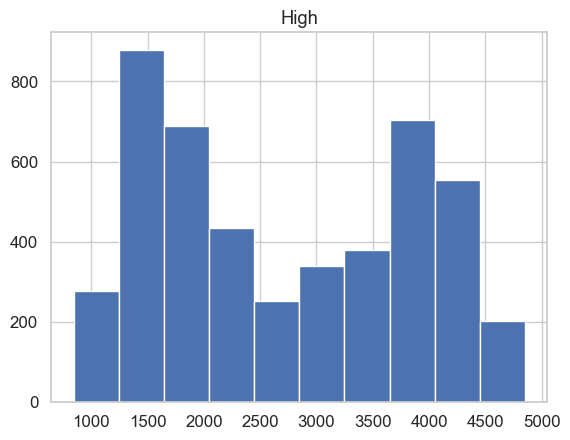

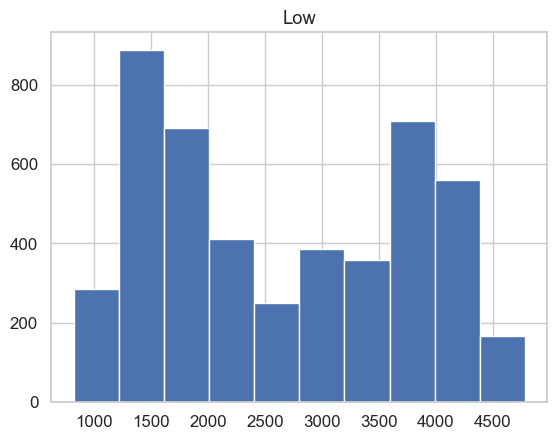

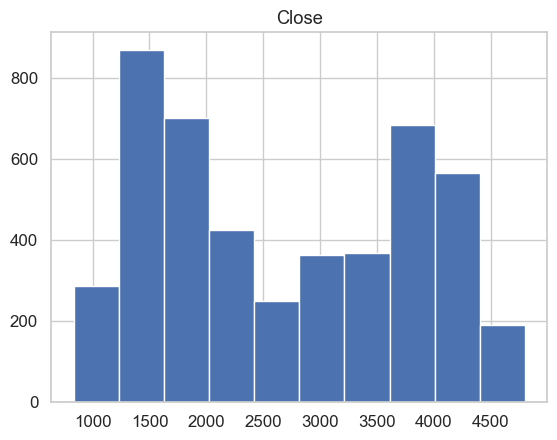

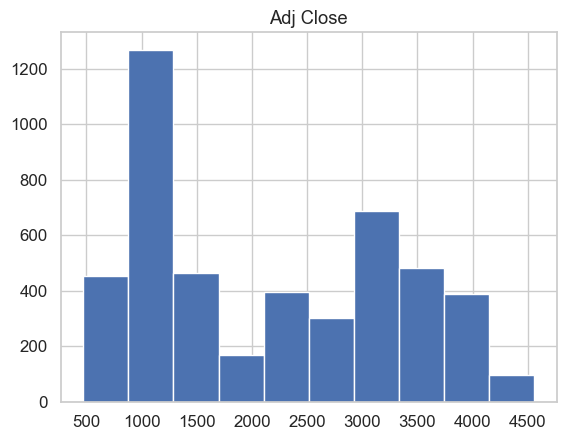

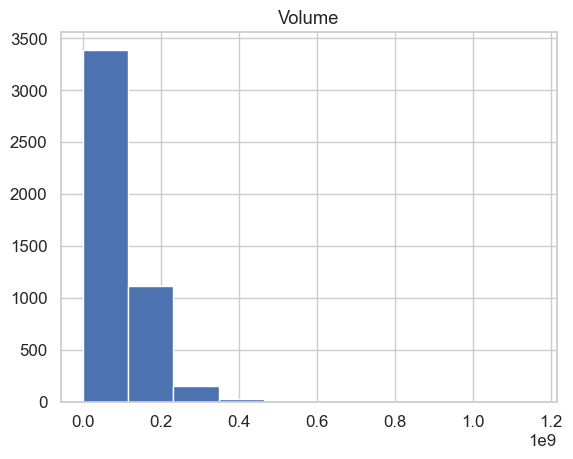

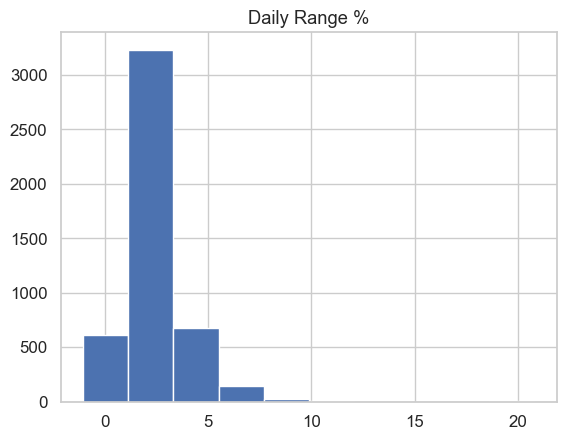

In [29]:
for i in range(len(stock_price.columns)):
    values = stock_price.iloc[:,i]
    plt.hist(values)
    x_name = stock_price.columns[i]
    plt.title('{x_name}'.format(x_name=x_name))
    plt.show()

### Comparative Analysis of Excel and Python for Data Analysis and Descriptive Statistics: Insights and Future Directions

Throughout the process of doing Assignments 1 and 2, I have learned a lot about the distinctions between data analysis and descriptive statistics using Python and Excel. When using the tools for different tasks, it becomes clear that each one has advantages and limits.

Without the need for programming knowledge, Excel's user-friendly interface makes it possible to quickly and easily manipulate, visualise, and compute simple descriptive statistics. Excel's built-in functions and capabilities are a wonderful choice for minor jobs that need to be completed quickly, especially for people who are not comfortable with programming. However, if you don't want to use the built-in functions, you can simply calculate values manually. Excel provides a variety of graph kinds that can successfully display your data, and its visual presentation capabilities assist you in creating well-organized workbooks.

However, Python is more powerful and flexible when it comes to processing, cleaning, and data analysis. Python allows for more sophisticated statistical analysis and data visualisations thanks to tools like pandas, numpy, and matplotlib. Additionally, Python makes it possible to handle larger datasets that may be difficult for Excel to handle and automate repetitive activities.

The work at hand and the user's level of experience with each programme determine which of Excel and Python to use. Excel may be the better option for basic tasks, fast analysis, or when working with non-programmers. However, Python might be a superior choice for more intricate data handling, larger datasets, or situations requiring more sophisticated statistical methods.

If I had to do this project all over, I would concentrate on investigating even more sophisticated statistical methods in Python and contrasting their application with Excel's functionalities. This would give a better grasp of the advantages and disadvantages of each instrument in different situations.

In terms of my knowledge gaps, I acknowledge that I still have a lot to learn about Python libraries and statistical approaches. I'd like to learn more about statistical modelling, machine learning methods, and time series analysis to hone my talents. I would also gain from honing my programming skills more, such as by learning how to use more Python libraries related to data analysis and producing more effective code.

# Conclusion

In summary, the dataset consists of 4,704 entries, detailing the daily trading metrics of a stock, including Open, High, Low, Close prices, Adjusted Close, and Volume. It offers a broad perspective on the stock's trading behavior across time. The data points to an average opening price of approximately 2694.11, with daily highs and lows averaging around 2724.41 and 2663.82, respectively, showcasing a stable trading range within each day. The average closing price closely aligns with the opening at around 2694.08, indicating a consistency in daily stock valuations.
The Adjusted Close price averages at 2164.72, highlighting the significant impact of adjustments such as dividends and stock splits on the stock's market valuation. The trading volume, an essential indicator of market activity and liquidity, averages at about 99,973,810 shares, with its variability reflecting differing levels of investor interest and engagement in the market.
The correlation analysis exposes a very high degree of connectivity (over 0.999) among the Open, High, Low, and Close prices, illustrating that these price metrics move in tight coordination throughout the trading day. This synchronization is a characteristic trait, demonstrating the coherence of intra-day price movements. The Adjusted Close price also shows a high correlation with these price points, albeit slightly lower, signifying the influence of external adjustments on the stock’s valuation. Conversely, Volume displays a minimal correlation with the price metrics, indicating that the daily trading volume and stock price changes do not directly correlate.